# Projet Câble sous-marin

# Partie théorique

$\textbf{Question 1}$ :<br><br>
La loi forte des grands nombres nous autorise à estimer l'espérance conditionelle par la moyenne empirique de simulations conditionnelles. En effet la suite des variables aléatoires $\frac{1}{K} \sum\limits_{k=0}^K L_{k}$ converge presque sûrement vers $\mathbb{E}(L) $ (avec les $L_k$ des variables aléatoires indépendantes, de même loi que $L$, que l'on suppose intégrable ou de carré intégrable). En simulant la valeur de $\frac{1}{K} \sum\limits_{k=0}^K L_{k}$, soit en calculant $\frac{1}{K} \sum\limits_{k=0}^K l_{k}$ avec les $l_k$ le résultat de la k-ième simulation de $L$, on obtiendra une valeur proche de $\mathbb{E}(L) $.<br><br>   On peut effectuer la même procedure avec des variable aléatoires $L'_k$ indépendante mais de loi $L|Z=z$ avec z un vecteur donné, pour avoir une éstimation de la longueur du cable avec certain points fixés.

$\textbf{Question 2}$ :<br><br>
On note $Y$ le vecteur aléatoire formé des composantes de $Z$ correspondant
aux points de discrétisation sans observation.<br><br>
Z est un vecteur aléatoire gaussien de matrice de covariance notée C calculée à partir de la distance entre les points et d'une fonction décroissante qui, appliquée auc coeffiscients d'une matrice de distance, donne une matrice définie positive (notée C aussi dans le polycopié).
<br><br>
    D'après le cours, si l'on note $C_y$ la matrice de covariance extraite de la matrice C pour les points fixés de Z (c'est donc la matrice qui contient uniquement les lignes et les colonnes dont l'indice correspond au numero d'un point de Z (en comptant à partir de zero) qui est fixé), alors $Y|Z=z$ est un vecteur gaussien qui admet pour densité la fonction: \begin{equation} f_{Y|Z=z}:y \rightarrow \frac{1}{(2\pi)^\frac{n-n_f}{2} \sqrt{\det{C S_Y}}}\exp(-\frac{1}{2} (y-\psi(z))^\top [C S_Y] ^{-1} (y-\psi(z)) \end{equation}
 <br><br>
 avec $n$ le nombre de points considérés dans $Z$, et $n_f$ le nombre de points fixés, $\psi(z) = m_Y + C_{Y,Z} C_{z}^{−1} (z − m_Z)$ ou $m_Y$ est le vecteur contenant les espérences des composantes de Y lorsqu'il n'y a pas de conditions et $C S_Y$  tel que  $C S_Y=C_Y − C_{Y,Z} C_Z^{−1}C_{Z,Y}$
 


$\textbf{Question 3}$ :<br><br>
$Y = (Y_1, . . . , Y_p)$ est un vecteur de composantes gaussiennes indépendantes, d’espérance nulle et de variance 1.

<br>
Nous allons utiliser le théorème qui stipule qu'un vecteur aléatoire est gaussien si et seulements si toute combinaison linéaire de ses composantes est une variable aléatoire gausienne.<br>
Prenons une composante de $RY$. Cette varaible aéatoire s'écrit comme une combinaison linéaire de composante de Y (car on a $[RY]_i=\sum\limits_{j=0}^p R_{ij}Y_j$  ).
<br>
Si on forme maintenant une combinaison linéaire quelconque de composante de $RY$, cette quantité va elle même pouvoir d'écrire comme un combinaison linéaire des composantes de $Y$. Le théorème nous dit donc que cette quantité est une variable aléatoire reelle gausienne.

Ainsi, toute combinaison des composantes de $RY$ est une variable aléatoire gaussienne. Le théorème nous dis alors que RY est un vecteur gaussien, et donc que $Z=m + RY$ est un vecteur gaussien, car m est constant.
<br> <br> 
On note C la matrice de covariance de Z.

<br>
Par linéarite de l'espérance, on a en calculant composante par composante:  $\mathbb{E}(Z)=m$ et par indépendances des $Y_i$, pour $0\leq i \leq p-1$ et $0\leq j \leq p-1$: <br>  $C_{ij}=cov(Z_i,Z_j)=cov(m_i + \sum\limits_{k=0}^p R_{ik}Y_k,m_j + \sum\limits_{k=0}^p R_{jk}Y_k = \sum\limits_{k=0}^p R_{ik}R_{jk}\mathbb{V}(Y_k)=\sum\limits_{k=0}^p R_{ik}R_{jk}={[R R^\top}]_{ij}$ 
<br>
Donc $C=R R^\top$
<br>
On connaît ainsi entièrement la loi de $Z$.


$\textbf{Question 4}$ :<br><br>
On connait déja les valeurs de Z pour les points ou il y a une observation. Il faut maintenant simuler le vecteur $Y$ de la question 2. Ce vecteur aléatoire est gaussien, et on connaît sa matrice de covariance $C_y=C S_y$ ainsi que son espérance  $\psi(z) = m_Y + C_{Y,Z} C_{z}^{−1} (z − m_Z)$. <br> <br>

On utilise la question précédente, qui nous permet de simuler à partir d'un vecteur gaussien de matrice de covariance la matrice identité et d'espérance nulle le vecteur gaussien qu'on cherche. 
On sait en effet simuler un vecteur gaussien de matrice de covariance la matrice identité et d'espérance nulle, cela  revient à simuler n fois une variable alétoire réelle gausienne)
 <br> <br>
 Pour que la méthode soit appliquable, il faut qu'il existe $R$ tel que $C_y=R R^\top$. Une telle matrice existe car $C_y$ est symétrique et définie positive (par propriété sur le complément de Schur: C est symétrique définie positive et en réorganisant les colonnes et lignes de C pour regrouper les indices correspondant aux points observés et ceux non obervés entre eux, le bloc en bas à gauche est la transposée du bloc en haut à droite).<br> <br>Pour la trouver, on utilise la fonction numpy linalg.cholesky. 

# Partie code

Voici la première partie du code donnée.

In [7]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500

N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))
  

    

$\textbf{Question 1}$ : On défini C qui retourne la covariance entre deux points (en prenant en argument la distance entre deux points

In [41]:
def C(M,a,sigma2):
    
    return sigma2*np.exp(-M/a)

$\textbf{Question 2}$ : On défini mat_distance qui retourne la matrice de distance 

In [44]:
def matrice_distance(x):
    A=np.array([x]*len(x)).T
    B=np.array([x]*len(x))
    return np.abs((A-B)*Delta)

$\textbf{Question 3}$ : Le calcul de la matrice de covariance est réalisé par le code suivant:

In [87]:
matrice_covZ=C(matrice_distance(discretization_indexes),a,sigma2)
print(matrice_covZ)

[[1.20000000e+01 7.27836792e+00 4.41455329e+00 ... 6.29146280e-21
  3.81596508e-21 2.31449982e-21]
 [7.27836792e+00 1.20000000e+01 7.27836792e+00 ... 1.03728685e-20
  6.29146280e-21 3.81596508e-21]
 [4.41455329e+00 7.27836792e+00 1.20000000e+01 ... 1.71019690e-20
  1.03728685e-20 6.29146280e-21]
 ...
 [6.29146280e-21 1.03728685e-20 1.71019690e-20 ... 1.20000000e+01
  7.27836792e+00 4.41455329e+00]
 [3.81596508e-21 6.29146280e-21 1.03728685e-20 ... 7.27836792e+00
  1.20000000e+01 7.27836792e+00]
 [2.31449982e-21 3.81596508e-21 6.29146280e-21 ... 4.41455329e+00
  7.27836792e+00 1.20000000e+01]]


$\textbf{Question 4}$ :

In [36]:
cov_z= matrice_covZ[0:101:20, 0:101:20]
cov_yz = np.transpose(np.delete(matrice_covZ, observation_indexes, axis=1)[0:101:20])
cov_y = np.delete(np.delete(matrice_covZ, observation_indexes, axis=0), observation_indexes, axis=1)

$\textbf{Question 5}$ :

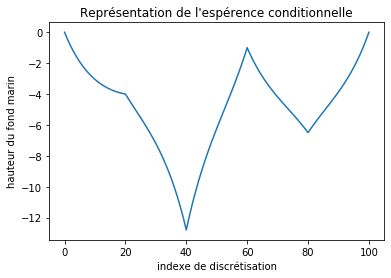

In [90]:
my = np.full((95),-5)
cov_z_inv = np.linalg.inv(cov_z)
m_cond = my + np.dot(cov_yz, np.dot(cov_z_inv, depth - np.full((6,), -5))) #Attention erreur de signe ? dans la formule c'est marqué - et non + mais on voit ici que c'est + qui marche
l = m_cond.copy()
for i in range(6):
    l = np.insert(l,observation_indexes[i],depth[i])
    

fig, ax = plt.subplots()
ax.set_title("Représentation de l'espérence conditionnelle")
ax.set_xlabel('indexe de discrétisation')
ax.set_ylabel('hauteur du fond marin')

plt.plot(l)
plt.show()

$\textbf{Question 6}$ :

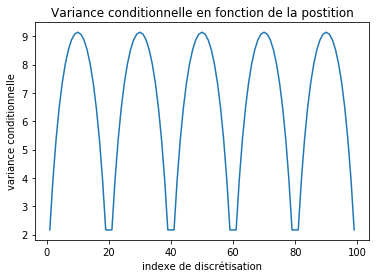

In [93]:
csy = cov_y - np.dot(cov_yz, np.dot(cov_z_inv, np.transpose(cov_yz)))

fig, ax = plt.subplots()
ax.set_title("Variance conditionnelle en fonction de la postition")
ax.set_xlabel('indexe de discrétisation')
ax.set_ylabel('variance conditionnelle')

plt.plot(np.delete(np.arange(101),observation_indexes),np.diag(csy))
plt.show()

Les coefficients diagonaux de la matrice de covariance sont les variances des profondeurs. 
On observe donc que la variance de la profondeur augmente lorsque l'on s'éloigne des points connus, ce qui semble logique.

$\textbf{Question 7}$ :

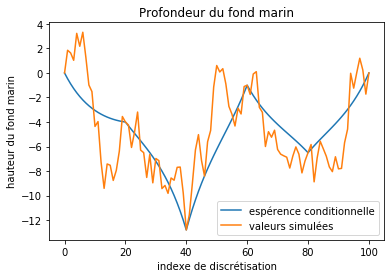

In [94]:
def simulation():
    y = np.random.randn(95)
    R = np.linalg.cholesky(csy)
    Z = m_cond + np.dot(R,y)
    for i in range(6):
        Z = np.insert(Z,observation_indexes[i],depth[i])
    return Z
Z = simulation()

fig, ax = plt.subplots()
ax.set_title("Profondeur du fond marin")
ax.set_xlabel('indexe de discrétisation')
ax.set_ylabel('hauteur du fond marin')

plt.plot(l ,label="espérence conditionnelle")
plt.plot(Z, label="valeurs simulées")
plt.legend()
plt.show()

On observe qu'on obtient bien des valeurs de profondeurs cohérentes avec les valeurs aux points d'observations : on a donc bien réalisé un conditionnement.

$\textbf{Question 8}$ :

In [49]:
def L(Z,delta):
    S=0
    for i in range(1,len(Z)):
        S+=np.sqrt(delta**2+(Z[i]-Z[i-1])**2)
    return S

$\textbf{Question 9}$ : Estimation de la longueur du cable:

In [50]:
def calcL(n):
    L_tot = 0
    for i in range(n):
        L_tot += L(simulation(), Delta)
    L_tot /= n
    return L_tot
    
    
l_m = L(l, Delta)
print("longueur de l'espérance conditionnelle : ", l_m)
L_tot = calcL(100)
print("espérance conditionnelle de la longueur : ", L_tot)

longueur de l'espérance conditionnelle :  501.6468416918411
espérance conditionnelle de la longueur :  522.2326826489247


On remarque que la longueur de l'espérance conditionnelle est plus petite que l'espérance conditionnelle de la longueur. En effet, alors que l'espérance conditionelle est le chemin le plus probable donc celui en ligne droite et donc le plus court, les chemins réels sont tous oscillants et donc plus longs. En conséquence, l'espérance conditionnelle de la longueur et plus longue et représente mieux la réalité.

$\textbf{Question 10}$ : On représente L en fonction de la simulation réalisée.

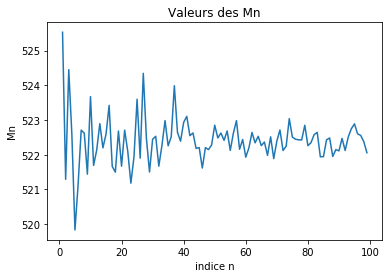

In [96]:
list_Long = []
for i in range(1,100):
    list_Long.append(calcL(i))
    
fig, ax = plt.subplots()
ax.set_title("Valeurs des Mn")
ax.set_xlabel('indice n')
ax.set_ylabel('Mn')
plt.plot([i for i in range(1,100)], list_Long)
plt.show()

La moyenne des longueurs de cables en fonction du nombre de simulations semble se stabiliser vers une valeur limite d'environ 475.8.

$\textbf{Question 11}$ : 

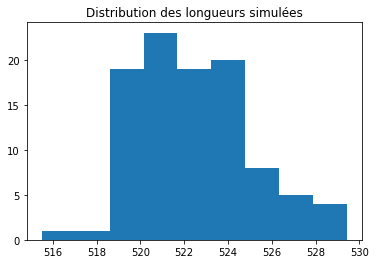

In [100]:
depths = [L(simulation(), Delta) for i in range(100)]

fig, ax = plt.subplots()
ax.set_title("Distribution des longueurs simulées")
plt.hist(depths,bins='auto')
plt.show()

$\textbf{Question 12}$ : La première méthode consiste en prendre l'intervalle autour de la moyenne des longeurs dans lequel il y a exactement 95% des valeurs de la simulation.

In [54]:
import statistics

m = statistics.mean(depths)
    
depths = sorted(depths, key=lambda a: abs(a - m))

taille = abs(depths[94] - m)

print("l'intervalle de confiance 95% est : [", m - taille, " , ", m + taille, "]")

l'intervalle de confiance 95% est : [ 517.4398750678167  ,  528.6761887523971 ]


La deuxième méthode consiste en calculer l'écart-type de l'échantillon. Le théorème centrale limite affirme que la loi de la moyenne converge vers un loi normale. On peut donc calculer l'intervalle de confiance à partir de l'écart-type.

In [55]:
S = 0
for x in depths:
    S += (m - x)**2
eType = np.sqrt(S/len(depths))
taille2 = 1.96 * eType
print("l'intervalle de confiance 95% est : [", m - taille2, " , ", m + taille2, "]")

l'intervalle de confiance 95% est : [ 517.3891575660386  ,  528.7269062541752 ]


$\textbf{Question 13}$ : En continuant le raisonnement de la 2e méthode on peut obtenir une estimation de la probabilité que la longueur du cable dépasse 525 m.

In [84]:
n=1000
p = np.sum(np.array([L(simulation(), Delta) for k in range(n)])>525.0)/n #on compte le nombre de simulations pour lesquelles L dépasse 525m
print("L'estimation est : ",p)
    

L'estimation est :  0.164


$\textbf{Question 14}$

In [101]:
def sim(n):
    print("Pour n = ",n)
    depths = [L(simulation(), Delta) for i in range(n)]
    
    fig, ax = plt.subplots()
    ax.set_title("Distribution des longueurs simulées")
    ax.set_xlabel('longueur (m)')
    ax.set_ylabel('fréquence')
    plt.hist(depths,bins='auto')
    plt.show()
    
    m = statistics.mean(depths)
    
    depths = sorted(depths, key=lambda a: abs(a - m))

    taille = abs(depths[int(0.95*n) - 1] - m)

    print("l'intervalle de confiance à 95% avec la première méthode est : [", m - taille, " , ", m + taille, "]")
    S = 0
    for x in depths:
        S += (m - x)**2
    eType = np.sqrt(S/len(depths))
    taille2 = 1.96 * eType
    print("l'intervalle de confiance à 95% avec la deuxième méthode est : [", m - taille2, " , ", m + taille2, "]")
    print("L'estimation est : ",np.sum(np.array(depths)>525.0)/n)

Pour n =  1000


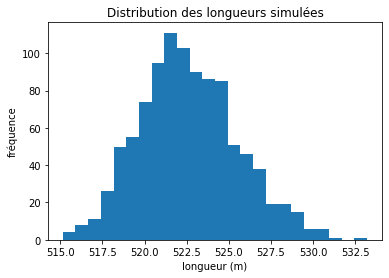

l'intervalle de confiance à 95% avec la première méthode est : [ 516.934269814225  ,  528.313025749801 ]
l'intervalle de confiance à 95% avec la deuxième méthode est : [ 516.9085788865497  ,  528.3387166774763 ]
L'estimation est :  0.2
Pour n =  10000


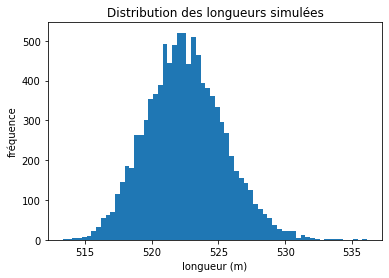

l'intervalle de confiance à 95% avec la première méthode est : [ 516.8880947537642  ,  528.1514675657389 ]
l'intervalle de confiance à 95% avec la deuxième méthode est : [ 516.8536489161081  ,  528.185913403395 ]
L'estimation est :  0.1917
Pour n =  100000


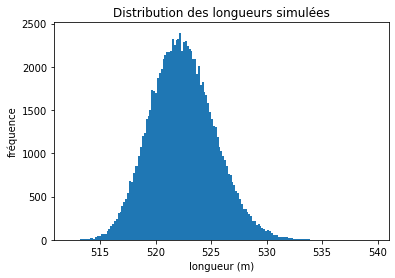

l'intervalle de confiance à 95% avec la première méthode est : [ 516.7731970470082  ,  528.0994353684797 ]
l'intervalle de confiance à 95% avec la deuxième méthode est : [ 516.7499016744558  ,  528.1227307410321 ]
L'estimation est :  0.18541


In [102]:
sim(1000)
sim(10000)
sim(100000)

L' estimation de la valeur de la probabilité de dépasser 525m semble converger.